# Integrate and Fire Neurons

We will be implementing a simulation of the Integrate and Fire (IAF) model of a neuron.

The model is described by the differential equation

$$\tau V'(t) = -V(t) + RI(t)$$

## Comparison with behaviour of a real neuron

The IAF model is a very simplistic model of a neuron, it is useful for modeling the behaviour of large networks, but compared to the behaviour of an actual neuron there are many differences. The main one noticable in the given article is that due to noise in the neuron, even given constant stimuli, the spikes are non-consistent in a real neuron, where they would be evenly spaced in the IAF model. The IAF model also lacks other things such as the mechanics of the spike (i.e. the actual time it takes to spike and refract).



## Simulation
This simulation produces animations, so it takes a little while to run, if you don't want to wait you can turn down the framerate

You can define arbitrary functions for $I(t)$ and pass them into the simulator object.

The rest of the constants can be changed as you wish

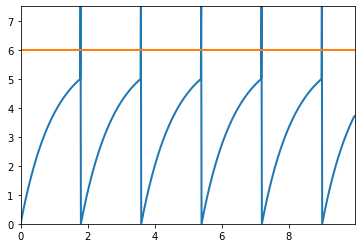

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation, rc
from IPython.display import HTML

class iAndfSim:
    def __init__(self, dt, maxT, initV, cap, res, threshold, injectionFunction):
        self.dt = dt
        self.time = [dt * t for t in range(math.ceil(maxT / dt))]
        self.initV = initV
        self.voltage = []
        self.cap = cap
        self.res = res
        self.tau = cap * res
        self.threshold = threshold
        self.spikeDisplay = threshold * 1.5
        self.injectionFunction = injectionFunction
        self.current = []
        
    def newVal(self, ov, dt, dv):
        return ov + dv * dt
    
    def dvdt(self, tau, res, v, i):
        return (res * i - v) / tau
            
    def run(self):
        self.voltage = [self.initV]
        self.current = [self.injectionFunction(0)]
        for t in self.time:
            self.current.append(self.injectionFunction(t))
            oldV = self.voltage[-1]
            tempV = self.newVal(oldV, self.dt, self.dvdt(self.tau, self.res, oldV, self.current[-1]))
            if oldV == self.spikeDisplay: 
                self.voltage.append(0)
            elif tempV > self.threshold:
                self.voltage.append(self.spikeDisplay)
            else: 
                self.voltage.append(tempV)
    
    def getAnimation(self, fps = 60):
        fig, ax = plt.subplots()
        ax.set_xlim((min(self.time), max(self.time)))
        ax.set_ylim((min(min(self.voltage), min(self.current)),
                     max(max(self.voltage), max(self.current))))
        vLine, = ax.plot([], [], lw=2)
        iLine, = ax.plot([], [], lw=2)
        self.frames = int(self.time[-1] * fps)
        
        
        def init():
            vLine.set_data([], [])
            iLine.set_data([], [])
            return (vLine, iLine)

        def animate(i):
            t =  int(i * len(self.time) / self.frames)
            vLine.set_data(self.time[:t], self.voltage[:t])
            iLine.set_data(self.time[:t], self.current[:t])
            return (vLine, iLine)
        
        return animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=self.frames, interval=1000/fps, blit=True)


def constantInjection(t):
    return 6

# Constants
dt        = 0.01
maxT      = 10
initV     = 0
cap       = 1
res       = 1
thresh    = 5
animationFPS = 40

# Simulator
sim = iAndfSim(dt, maxT, initV, cap, res, thresh, constantInjection)
sim.run()
HTML(sim.getAnimation(animationFPS).to_html5_video())

That was our IAF model for a constant current injection, let's see what it looks like when we stop injecting partway through the simulation

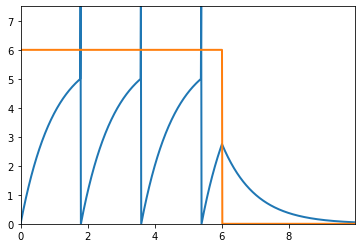

In [6]:
def cutoff(f, low, high):
    """
    Return the following piecewise function:
    low <= t <= high: f(t)
    else:             0
    """
    return lambda t: f(t) if low <= t <= high else 0

sim.injectionFunction = cutoff(constantInjection, 0, 6)
sim.run()
HTML(sim.getAnimation(animationFPS).to_html5_video())

Now we'll look at a sinusoidal injection and another one for fun

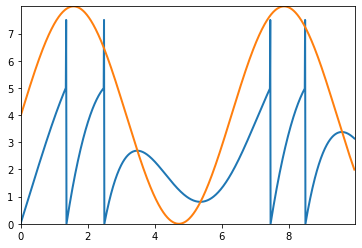

In [7]:
def sineInjection(t):
    return 4 * (1 + math.sin(t))

sim.injectionFunction = sineInjection
sim.run()
HTML(sim.getAnimation(animationFPS).to_html5_video())

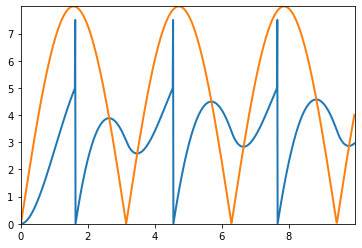

In [8]:
def absSineInjection(t):
    return 8 * abs(math.sin(t))

sim.injectionFunction = absSineInjection
sim.run()
HTML(sim.getAnimation(animationFPS).to_html5_video())